In [2]:
using PyCall, PyPlot, DSP
@pyimport seaborn as sns
@pyimport sys
@pyimport os

rc_params = Dict("lines.linewidth"=>1.5, "text.usetex"=>true)
sns.set(style="ticks", font="serif", palette="Set1", context="paper", font_scale=1.5, rc=rc_params)

# Single photon transitions

In [3]:
# loading data from files
f = open("../Data/2016-01-29_776nm_8213A_g1.dat")

for line in eachline(f)
    print(line)
    break
end

full_data_array = readdlm("../Data/2016-01-29_776nm_8213A_g1.dat", skipstart=1)

time = full_data_array[:, 2]
distance = full_data_array[:,3]
analog1 = full_data_array[:,4]
analog3 = full_data_array[:,6]

Iteration	Time	Analog 0	Analog 1	Analog 2	Analog 3	Analog 4	Analog 5	Analog 6	Analog 7


601-element Array{Float64,1}:
  3.9092
 -3.4473
 -1.6116
  4.9506
 -2.772 
 -6.5708
  2.981 
  5.4641
 -4.0076
 -2.2076
  3.8227
 -2.1214
 -3.4096
  ⋮     
  3.7197
 -3.1978
  1.0533
  2.4642
 -6.2038
 -2.4081
  7.583 
  1.5655
 -6.1931
  0.5675
  3.45  
 -3.3459

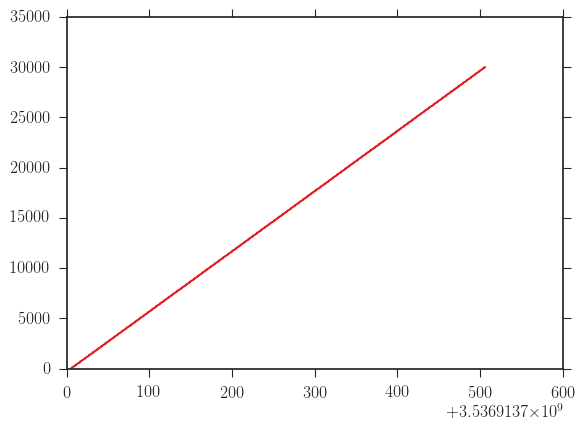

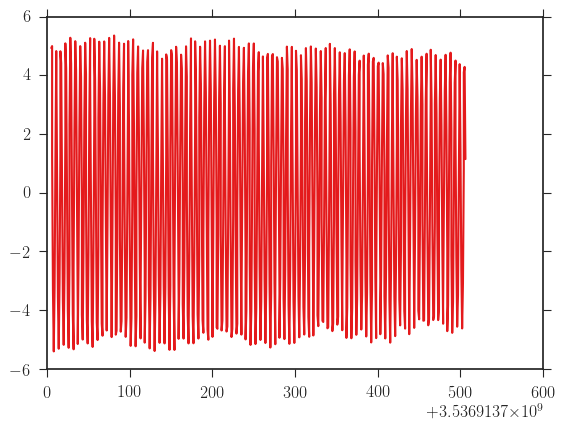

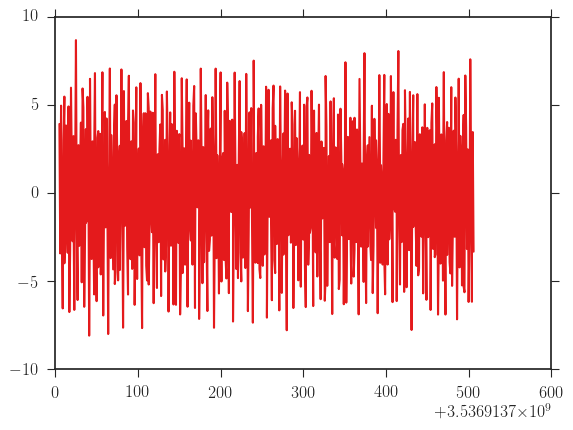

In [4]:
for signal in Any[distance, analog1, analog3]
    fig = figure()
    axe = fig[:add_subplot](1,1,1)
    axe[:plot](time, signal)
end

In [5]:
full_signal = analog1 + im*analog3

601-element Array{Complex{Float64},1}:
  4.9356+3.9092im
  5.0014-3.4473im
  1.2473-1.6116im
 -3.3128+4.9506im
 -5.4082-2.772im 
 -3.2331-6.5708im
  1.1244+2.981im 
  4.7305+5.4641im
  4.8307-4.0076im
  0.8823-2.2076im
 -3.5574+3.8227im
 -5.3172-2.1214im
 -3.0392-3.4096im
        ⋮        
 -3.4862+3.7197im
  0.3424-3.1978im
   3.735+1.0533im
  4.3851+2.4642im
  1.4223-6.2038im
 -2.6149-2.4081im
 -4.6258+7.583im 
 -3.0761+1.5655im
  0.8039-6.1931im
  4.1052+0.5675im
  4.2915+3.45im  
  1.1481-3.3459im

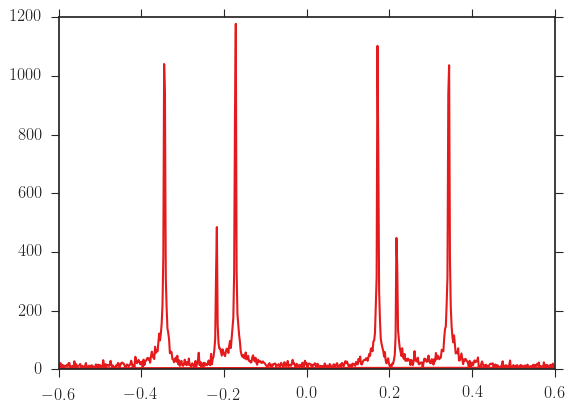

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8f8b9b5f28>

In [6]:
delta_t = mean(diff(time))
frequencies = fftfreq(length(full_signal), 1/delta_t)
ft_analog1 = fft(analog1)
ft_full_signal = fft(full_signal)
plot(frequencies, abs(ft_full_signal))

In [ ]:
ft_back_full_signal = fft(ft_full_signal)
plot(time, ft_back_full_signal)

In [2]:
for i in [1:10]
    x = randn(10000000)
    @time fft(x)
end

 in depwarn at deprecated.jl:73
 in anonymous at no file
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/thiele/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/thiele/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[2], in expression starting on line 1


0.472810 seconds (62 allocations: 305.179 MB, 6.54% gc time)
  0.485279 seconds (62 allocations: 305.179 MB, 5.03% gc time)
  0.472607 seconds (62 allocations: 305.179 MB, 5.72% gc time)
  0.543380 seconds (62 allocations: 305.179 MB, 4.60% gc time)
  0.504791 seconds (62 allocations: 305.179 MB, 5.15% gc time)
  0.492955 seconds (62 allocations: 305.179 MB, 5.17% gc time)
  0.473391 seconds (62 allocations: 305.179 MB, 5.42% gc time)
  0.495902 seconds (62 allocations: 305.179 MB, 5.16% gc time)
  0.473412 seconds (62 allocations: 305.179 MB, 5.43% gc time)
  0.497430 seconds (62 allocations: 305.179 MB, 5.17% gc time)
